## Criando dataframe do exemplo da aula

In [19]:
import pandas as pd
import numpy as np

In [20]:


data = [['Jessica', 'Oceans Eleven', 2], 
        ['Jessica', 'The Lion King', 4], 
        ['Jessica', 'Braveheart', 3], 
        ['Jessica', 'Independence Day', 2],
        ['Jessica', 'Deby&Loide', 3],
        ['Marta', 'The Princess Diary', 4], 
        ['Marta', 'Oceans Eleven', 3], 
        ['Marta', 'Braveheart', 4], 
        ['Marta', 'Independence Day', 3],
        ['Marta', 'Deby&Loide', 2],
        ['Jose', 'The Princess Diary', 1], 
        ['Jose', 'Oceans Eleven', 5], 
        ['Jose', 'The Lion King', 3], 
        ['Jose', 'Braveheart', 4], 
        ['Jose', 'Deby&Loide', 5],
        ['Dave', 'The Princess Diary', 1], 
        ['Dave', 'The Lion King', 2], 
        ['Dave', 'Braveheart', 3], 
        ['Dave', 'Independence Day', 4]]
        
genres = [['The Princess Diary', 'Drama|Comedia'],
          ['Oceans Eleven', 'Acao|Comedia'],
          ['The Lion King', 'Drama|Sci-Fi'],
          ['Braveheart', 'Drama|Acao'],
          ['Independence Day', 'Acao|Sci-Fi'],
          ['Deby&Loide', 'Comedia']]

df = pd.DataFrame(data, columns=['user','item', 'rating'])
movies = pd.DataFrame(genres, columns=['item','genres'])
df

,user,item,rating
0,Jessica,Oceans Eleven,2
1,Jessica,The Lion King,4
2,Jessica,Braveheart,3
3,Jessica,Independence Day,2
4,Jessica,Deby&Loide,3
5,Marta,The Princess Diary,4
6,Marta,Oceans Eleven,3
7,Marta,Braveheart,4
8,Marta,Independence Day,3
9,Marta,Deby&Loide,2


In [21]:
movies

,item,genres
0,The Princess Diary,Drama|Comedia
1,Oceans Eleven,Acao|Comedia
2,The Lion King,Drama|Sci-Fi
3,Braveheart,Drama|Acao
4,Independence Day,Acao|Sci-Fi
5,Deby&Loide,Comedia


## Mapeando usuários e itens para ids

In [22]:
map_users = {user: idx for idx, user in enumerate(df.user.unique())}
map_items = {item: idx for idx, item in enumerate(df.item.unique())}
df['userId'] = df['user'].map(map_users)
df['itemId'] = df['item'].map(map_items)
df

,user,item,rating,userId,itemId
0,Jessica,Oceans Eleven,2,0,0
1,Jessica,The Lion King,4,0,1
2,Jessica,Braveheart,3,0,2
3,Jessica,Independence Day,2,0,3
4,Jessica,Deby&Loide,3,0,4
5,Marta,The Princess Diary,4,1,5
6,Marta,Oceans Eleven,3,1,0
7,Marta,Braveheart,4,1,2
8,Marta,Independence Day,3,1,3
9,Marta,Deby&Loide,2,1,4


In [23]:
movies['itemId'] = movies['item'].map(map_items)
movies

,item,genres,itemId
0,The Princess Diary,Drama|Comedia,5
1,Oceans Eleven,Acao|Comedia,0
2,The Lion King,Drama|Sci-Fi,1
3,Braveheart,Drama|Acao,2
4,Independence Day,Acao|Sci-Fi,3
5,Deby&Loide,Comedia,4


In [24]:
movies_genres = movies.drop('genres', axis=1).join(movies.genres.str.split('|', expand=True)
             .stack().reset_index(drop=True, level=1).rename('genre'))
movies_genres

,item,itemId,genre
0,The Princess Diary,5,Drama
0,The Princess Diary,5,Comedia
1,Oceans Eleven,0,Acao
1,Oceans Eleven,0,Comedia
2,The Lion King,1,Drama
2,The Lion King,1,Sci-Fi
3,Braveheart,2,Drama
3,Braveheart,2,Acao
4,Independence Day,3,Acao
4,Independence Day,3,Sci-Fi


### Funções para obter informações específicas do DataFrame

In [25]:
# Obter a nota que um usuário deu para um item.
def get_rating(userId,itemId):
    if len(df[(df['userId']==userId)&(df['itemId']==itemId)]) == 0:
        return 0
    return (df.loc[(df.userId==userId) & (df.itemId == itemId),'rating'].iloc[0])

get_rating(1, 5)

np.int64(4)

In [26]:
# Obter a lista de todos os itens que um usuário avaliou.
def get_item_ids(userId):
    if userId not in df['userId'].values:
        return []
    return (df.loc[(df.userId==userId),'itemId'].tolist())

get_item_ids(0)

[0, 1, 2, 3, 4]

In [27]:
# Obter o título do item dado o seu id.
def get_item_title(itemId):
    if itemId not in df['itemId'].values:
        return ''
    return (df.loc[(df.itemId == itemId),'item'].iloc[0])

get_item_title(0)

'Oceans Eleven'

In [28]:
# Obter a lista de ratings de um usuário.
def get_user_ratings(userId):
    if userId not in df['userId'].values:
        return []
    return (df.loc[(df.userId==userId),'rating'].tolist())

get_user_ratings(0)

[2, 4, 3, 2, 3]

In [29]:
# Obter a lista de ratings de um usuário.
def get_item_ratings(itemId):
    if itemId not in df['itemId'].values:
        return []
    return (df.loc[(df.itemId==itemId),'rating'].tolist())

get_item_ratings(0)

[2, 3, 5]

In [30]:
# Obter a média de ratings de um usuário
def get_user_mean(userId):
    return np.mean(get_user_ratings(userId))

get_user_mean(1)

np.float64(3.2)

In [31]:
# Obter a média de ratings de um item
def get_item_mean(itemId):
    return np.mean(get_item_ratings(itemId))

get_item_mean(1)

np.float64(3.0)

In [32]:
# Obter a lista de gêneros de um item
def get_genres(itemId):
    if itemId not in movies_genres['itemId'].values:
        return []
    return movies_genres.loc[(movies_genres.itemId==itemId),'genre'].tolist()

get_genres(0)

['Acao', 'Comedia']

### Computar a similaridade de itens usando Jaccard aplicado aos gêneros

In [33]:
from math import pow, sqrt

def similarity_score(itemId1, itemId2):
    '''
    itemId1 & itemId2 : ids dos dois itens cuja similaridade será computada
    '''
    # Obter os gêneros de cada item.
    genre_list1 = get_genres(itemId1)
    genre_list2 = get_genres(itemId2)
    common_genres = list(set(genre_list1) & set(genre_list2))
    if len(common_genres) == 0:
        return 0
    
    # Calcular Jaccard
    return len(common_genres) / len(set(genre_list1 + genre_list2))

similarity_score(4, 5)

0.5

### Obter os itens mais similares

In [34]:
def most_similar_items(itemId, k):
    '''
    itemId : Targeted item
    k : qtde de vizinhos
    '''
    # Obter lista de itens.
    item_ids = df.itemId.unique().tolist()
    
    # Obter a similaridade entre o item alvo e os demais itens
    sim = [(similarity_score(itemId, i), i) for i in item_ids if i != itemId]
    
    # Ordenação inversa.
    sim.sort()
    sim.reverse()
    
    # Retornando os itens? mais similares. 
    return sim[:k]

print(most_similar_items(0, 2))

[(0.5, 4), (0.3333333333333333, 5)]


### Calcular a nota

In [35]:
def get_prediction(userId, itemId, k):
    item_mean = get_item_mean(itemId)
    similar_items = most_similar_items(itemId, k)
    num = []
    den = []
    
    for s, j in similar_items:
        rj = get_rating(userId, j)
        if rj == 0:
            continue
        num.append(s * (rj - get_item_mean(j)))
        den.append(s)
    
    return item_mean + sum(num) / sum(den)

get_prediction(3, 4, 2)

np.float64(2.3333333333333335)

## Aprendizado de Máquina

### Importar base de dados

In [36]:
# import wget
# !python3 -m wget https://github.com/mmanzato/MBABigData/raw/master/ml-20m-compact.tar.gz
# !tar -xvzf ml-20m-compact.tar.gz

In [37]:
movies = pd.read_csv('./dataset/movies_sample.csv')
ratings = pd.read_csv('./dataset/ratings_sample.csv')
df = ratings[['userId', 'movieId', 'rating']]
df = df.merge(movies[['movieId', 'title']])
map_users = {user: idx for idx, user in enumerate(df.userId.unique())}
map_items = {item: idx for idx, item in enumerate(df.movieId.unique())}
df['userId'] = df['userId'].map(map_users)
df['movieId'] = df['movieId'].map(map_items)

movies['movieId'] = movies['movieId'].map(map_items)
movies = movies.dropna(axis=0)
movies['movieId'] = movies['movieId'].astype(int)

map_title = {}

for _, row in df.iterrows():
    map_title[row.movieId] = row.title
    
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=2)

/tmp/ipykernel_51909/1303446372.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv('./dataset/ratings_sample.csv')


In [38]:
movies.head()

,movieId,title,genres
0,49,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
1,61,Dangerous Minds (1995),Drama
2,125,Across the Sea of Time (1995),Documentary|IMAX
3,23,Crimson Tide (1995),Drama|Thriller|War
4,56,Showgirls (1995),Drama


In [39]:
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])
movies_exp = movies.join(movies.genres.str.get_dummies().astype(bool))
movies_exp.drop('genres', inplace=True, axis=1)
movies_exp['Bias'] = True
movies_exp

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Bias
0,49,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,61,Dangerous Minds (1995),False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,125,Across the Sea of Time (1995),False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
3,23,Crimson Tide (1995),False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
4,56,Showgirls (1995),False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,358,New Scenes from America (2002),False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
428,246,Bright Days Ahead (2013),False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
430,391,A Rumor Of War (1980),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
431,394,Berserk: The Golden Age Arc 3 - Descent (2013),False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### Treinamento do modelo

In [40]:
def train_linearcbf(train, features, n_features, lr=0.05, reg=0.02, miter=10):
    n_users = df['userId'].max()+1    
    profiles = np.random.normal(0.0, 0.1, (n_users, n_features))
    
    error = []
    for t in range(miter):
        sq_error = 0
        for index, row in train.iterrows():
            u = row['userId']
            i = row['movieId']
            r_ui = row['rating']
            pred = np.dot(profiles[u], features[i])
            e_ui = pred - r_ui
            sq_error = sq_error + pow(e_ui, 2)
            for k in range(n_features):
                profiles[u][k] = profiles[u][k] - lr * (e_ui * features[i][k] + reg * profiles[u][k])
        
        error.append(sqrt(sq_error/len(train)))
    
    return profiles, error

In [41]:
features = movies_exp.iloc[:,2:].to_numpy(dtype=int)
n_movies, n_features = features.shape
profiles, error = train_linearcbf(train, features, n_features)

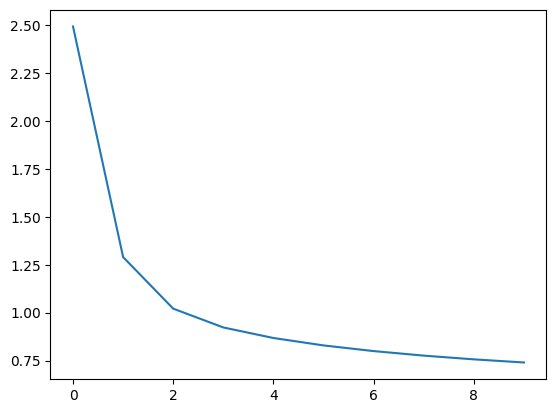

In [42]:
import matplotlib.pyplot as plt

plt.plot(error)
plt.show()

### Predição

In [43]:
test.head()

,userId,movieId,rating,title
31477,1836,60,2.5,She's the Man (2006)
148621,8646,33,3.5,North by Northwest (1959)
25190,1464,19,4.5,Reservoir Dogs (1992)
91518,5315,33,5.0,North by Northwest (1959)
113446,6571,18,4.0,Life Is Beautiful (La Vita è bella) (1997)


In [44]:
pred = np.dot(profiles[729], features[11])
pred

np.float64(3.297812538688943)

In [45]:
features[11]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

## Usando a bilbioteca CaseRecommender com CBF

In [46]:
movies_genres = movies.drop('genres', axis=1).join(movies.genres.str.split('|', expand=True)
             .stack().reset_index(drop=True, level=1).rename('genre'))
movies_genres.dropna(inplace=True)
movies_genres['movieId'] = movies_genres.movieId.astype(int)
movies_genres.head()

,movieId,title,genre
0,49,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime
0,49,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Drama
1,61,Dangerous Minds (1995),Drama
2,125,Across the Sea of Time (1995),Documentary
2,125,Across the Sea of Time (1995),IMAX


In [47]:
movies_genres[['movieId', 'genre']].to_csv('items_genres.dat', index=False, sep='\t', header=False)
train.to_csv('train.dat', index=False, header=False, sep='\t')
test.to_csv('test.dat', index=False, header=False, sep='\t')

In [48]:
from caserec.recommenders.rating_prediction.item_attribute_knn import ItemAttributeKNN

ItemAttributeKNN('train.dat', 'test.dat', metadata_file='items_genres.dat', as_similar_first=True).compute()

[Case Recommender: Rating Prediction > Item Attribute KNN Algorithm]

train data:: 11090 users and 405 items (152496 interactions) | sparsity:: 96.60%
test data:: 10571 users and 331 items (38125 interactions) | sparsity:: 98.91%

training_time:: 3.687475 sec
>> metadata:: 417 items and 20 metadata (890 interactions) | sparsity:: 89.33%
prediction_time:: 0.325189 sec
Eval:: MAE: 0.730899 RMSE: 0.963254 


# Um exemplo de Filtragem Baseada em Conteúdo usando MLP

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import zipfile
import os
import urllib.request

# Baixar o dataset MovieLens 100k
url = "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
output_dir = "ml-100k"
if not os.path.exists(output_dir):
    urllib.request.urlretrieve(url, "ml-100k.zip")
    with zipfile.ZipFile("ml-100k.zip", 'r') as zip_ref:
        zip_ref.extractall()

# Carregar os dados
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', header=None)
ratings = pd.read_csv('ml-100k/u.data', sep='\t', header=None)

# Renomear colunas para facilitar o uso
movies.columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
ratings.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

# Manter apenas as colunas necessárias
movies = movies[['movie_id', 'title', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

print(movies.head())
print(ratings.head())

   movie_id              title  Action  Adventure  Animation  Children  \
0         1   Toy Story (1995)       0          0          1         1   
1         2   GoldenEye (1995)       1          1          0         0   
2         3  Four Rooms (1995)       0          0          0         0   
3         4  Get Shorty (1995)       1          0          0         0   
4         5     Copycat (1995)       0          0          0         0   

   Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  \
0       1      0            0      0        0          0       0        0   
1       0      0            0      0        0          0       0        0   
2       0      0            0      0        0          0       0        0   
3       1      0            0      1        0          0       0        0   
4       0      1            0      1        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0 

In [50]:
# Dividir as avaliações em treinamento e teste
train_ratings, test_ratings = train_test_split(ratings, test_size=0.2, random_state=42)


In [51]:
user_ratings = train_ratings[(train_ratings['user_id'] == 5)]
user_movies = pd.merge(user_ratings, movies, on='movie_id')
X = user_movies.drop(['user_id', 'movie_id', 'rating', 'timestamp', 'title'], axis=1)
y = user_movies['rating']
print(X)
print(y)

     Action  Adventure  Animation  Children  Comedy  Crime  Documentary  \
0         0          0          0         0       1      0            0   
1         0          0          0         0       0      0            0   
2         0          0          0         0       1      0            0   
3         0          0          0         0       0      0            0   
4         0          0          0         0       0      0            0   
..      ...        ...        ...       ...     ...    ...          ...   
133       1          0          0         0       0      0            0   
134       0          0          0         0       0      0            0   
135       1          1          0         0       1      0            0   
136       0          0          0         0       0      0            0   
137       0          0          0         0       0      0            0   

     Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
0        0        0   

In [52]:
# Inicializar objetos para armazenar os modelos
user_models = {}

# Para cada usuário, treinar um modelo
for user_id in train_ratings['user_id'].unique():
    # Selecionar filmes avaliados
    user_ratings = train_ratings[(train_ratings['user_id'] == user_id)]

    # Obter os filmes avaliados pelo usuário e seus respectivos gêneros
    user_movies = pd.merge(user_ratings, movies, on='movie_id')

    if len(user_movies) > 1:  # Treinar apenas se houver mais de um filme avaliado
        # Preparar os dados para treinamento da MLP
        X = user_movies.drop(['user_id', 'movie_id', 'rating', 'timestamp', 'title'], axis=1)
        y = user_movies['rating']

        # Treinar a MLP
        mlp = MLPRegressor(hidden_layer_sizes=(50, 30), activation='relu', max_iter=1000, random_state=42)
        mlp.fit(X, y)

        # Salvar o modelo e o scaler do usuário
        user_models[user_id] = mlp

In [53]:
def recommend_movies(user_id, k=10):
    if user_id in user_models:
        # Obter o modelo do usuário
        mlp = user_models[user_id]
        
        # Prever as avaliações para todos os filmes
        all_movies = movies.drop(['movie_id', 'title'], axis=1)        
        predicted_ratings = mlp.predict(all_movies)

        # Adicionar as previsões ao DataFrame original
        movies['predicted_rating'] = predicted_ratings

        # Remover os filmes que o usuário já avaliou
        user_rated_movies = train_ratings[train_ratings['user_id'] == user_id]['movie_id']
        recommended_movies = movies[~movies['movie_id'].isin(user_rated_movies)]

        # Ordenar os filmes pelas previsões e exibir os top k
        recommended_movies = recommended_movies.sort_values(by='predicted_rating', ascending=False)

        return recommended_movies[['title', 'predicted_rating']].head(k)
    else:
        return f"User {user_id} does not have enough data to train a model."


In [54]:
def get_user_watched_movies(user_id):
    """
    Retorna os filmes que o usuário viu e as notas correspondentes conforme o conjunto de treinamento.

    Parâmetros:
    user_id (int): O ID do usuário.

    Retorna:
    DataFrame: Um DataFrame contendo os títulos dos filmes e as notas correspondentes.
    """
    # Selecionar filmes avaliados
    user_ratings = train_ratings[(train_ratings['user_id'] == user_id)]
    
    # Mesclar com o DataFrame de filmes para obter os títulos dos filmes
    user_movies = pd.merge(user_ratings, movies[['movie_id', 'title']], on='movie_id')
    
    # Selecionar as colunas relevantes (título do filme e nota)
    user_movies = user_movies[['title', 'rating']]
    
    return user_movies

In [55]:
user_id = 20
watched_movies = get_user_watched_movies(user_id)
print("Filmes assistidos pelo usuário e as respectivas notas:")
print(watched_movies)

top_movies = recommend_movies(user_id, k=10)
print("Top 10 filmes recomendados:")
print(top_movies)

Filmes assistidos pelo usuário e as respectivas notas:
                                           title  rating
0             Ghost and the Darkness, The (1996)       5
1                                Die Hard (1988)       2
2                  Miracle on 34th Street (1994)       3
3                    Beauty and the Beast (1991)       4
4                      Young Frankenstein (1974)       2
5                  Independence Day (ID4) (1996)       3
6                           Jungle2Jungle (1997)       4
7                    Preacher's Wife, The (1996)       4
8         One Flew Over the Cuckoo's Nest (1975)       1
9                                 Twister (1996)       4
10               Empire Strikes Back, The (1980)       3
11                             Home Alone (1990)       2
12                                 Eraser (1996)       3
13                     Return of the Jedi (1983)       4
14                                 Ransom (1996)       4
15                     African Qu